In [97]:
import pandas as pd
import seaborn as sns
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [98]:
#df = pd.read_csv('D:/KULIAH/PRIGEL/KODING/ANALISIS/DATASET/TWITTER/unnes27082023.csv', engine='python')
df = pd.read_csv('D:/KULIAH/PRIGEL/KODING/ANALISIS/DATASET/TWITTER/unnes29082023.csv', delimiter=';')

df.head()


,created_at,id_str,text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Aug 29 23:59:24 +0000 2023,"1,69667E+18","-ness niat baik ngasi job ke anak Unnes, malah...",0,2,0,2,in,"1,18728E+18","1,69667E+18",unnesmenfess,https://twitter.com/unnesmenfess/status/169667...
1,Tue Aug 29 23:47:23 +0000 2023,"1,69667E+18",@unnesmenfess https://t.co/PiKDLydxPP,0,0,0,0,qme,"1,67212E+18","1,69667E+18",jekbersinergi,https://twitter.com/jekbersinergi/status/16966...
2,Tue Aug 29 23:44:16 +0000 2023,"1,69667E+18",-ness need anjem jam 7.35 area unnes,0,7,0,0,en,"1,18728E+18","1,69667E+18",unnesmenfess,https://twitter.com/unnesmenfess/status/169667...
3,Tue Aug 29 23:41:34 +0000 2023,"1,69667E+18",-ness ada anjem cewe yang bisa nganter jam 7 p...,0,6,0,0,in,"1,18728E+18","1,69667E+18",unnesmenfess,https://twitter.com/unnesmenfess/status/169666...
4,Tue Aug 29 23:32:53 +0000 2023,"1,69667E+18",@FitrahDharul @alqodrifaqih @aniesbaswedan @BE...,0,1,0,1,in,"1,45251E+18","1,69644E+18",EviDrajat,https://twitter.com/EviDrajat/status/169666726...


In [99]:
print(df.columns)

Index(['created_at', 'id_str', 'text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')


Data Preprocessing

In [100]:
# drop unnecessary columns

df = df.drop(['created_at', 'id_str', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'], axis=1)
df.head()

,text
0,"-ness niat baik ngasi job ke anak Unnes, malah..."
1,@unnesmenfess https://t.co/PiKDLydxPP
2,-ness need anjem jam 7.35 area unnes
3,-ness ada anjem cewe yang bisa nganter jam 7 p...
4,@FitrahDharul @alqodrifaqih @aniesbaswedan @BE...


In [101]:
df.isnull().sum()

text    0
dtype: int64

In [102]:
df.shape

(501, 1)

DATA CLEANING

In [103]:
def clean_text(text):
  
    text = re.sub(r'http\S+', '', text)  # URL
    text = re.sub(r'@\w+', '', text)  # Mentions
    if re.search(r'<[^>]+>', text):
        text = BeautifulSoup(text, 'html.parser').get_text()  # HTML tags
    text = re.sub(r'\[.*?\]|\{.*?\}', '', text) # Brackets
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Special character & Punctuation
    
    text = text.lower() # Convert lowercase
    
    tokens = nltk.word_tokenize(text) # tokenize text
    
    
    # Remove stopwords 
    # Normally using stopwords only deletes all the default stopwords.
    # But here I need to remove some stopwords besides the default words. So I have to use custom stopwords.
    
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(['https', 'http'])  # custom stopwords 
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in custom_stopwords]
    
    # join 
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

# Apply the cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

In [104]:
df.head()

,text,cleaned_text
0,"-ness niat baik ngasi job ke anak Unnes, malah...",ness niat baik ngasi job ke anak unnes malah k...
1,@unnesmenfess https://t.co/PiKDLydxPP,
2,-ness need anjem jam 7.35 area unnes,ness need anjem jam area unnes
3,-ness ada anjem cewe yang bisa nganter jam 7 p...,ness ada anjem cewe yang bisa nganter jam pagi...
4,@FitrahDharul @alqodrifaqih @aniesbaswedan @BE...,sorrybegitu liat ternyata ahbelajar dulu aja y...


TOKENIZE THE DATA

In [105]:
df['tokenize_text'] = df['cleaned_text'].apply(word_tokenize)


REMOVE INFREQUNT WORDS

In [106]:
# we convert tokenize col to string and keep only those words which are bigger than double (2) length

df['rmv_infrequent'] = df['tokenize_text'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df.head()


,text,cleaned_text,tokenize_text,rmv_infrequent
0,"-ness niat baik ngasi job ke anak Unnes, malah...",ness niat baik ngasi job ke anak unnes malah k...,"[ness, niat, baik, ngasi, job, ke, anak, unnes...",ness niat baik ngasi job anak unnes malah kete...
1,@unnesmenfess https://t.co/PiKDLydxPP,,[],
2,-ness need anjem jam 7.35 area unnes,ness need anjem jam area unnes,"[ness, need, anjem, jam, area, unnes]",ness need anjem jam area unnes
3,-ness ada anjem cewe yang bisa nganter jam 7 p...,ness ada anjem cewe yang bisa nganter jam pagi...,"[ness, ada, anjem, cewe, yang, bisa, nganter, ...",ness ada anjem cewe yang bisa nganter jam pagi
4,@FitrahDharul @alqodrifaqih @aniesbaswedan @BE...,sorrybegitu liat ternyata ahbelajar dulu aja y...,"[sorrybegitu, liat, ternyata, ahbelajar, dulu,...",sorrybegitu liat ternyata ahbelajar dulu aja j...


In [107]:
# after remove rare or infrequent words, join all the words

all_words = ' '.join([word for word in df['rmv_infrequent']])

Frequency Distribution

In [108]:
from nltk.probability import FreqDist


tokenize = nltk.tokenize.word_tokenize(all_words)
frequency_distribution = FreqDist(tokenize)

frequency_distribution


FreqDist({'ness': 216, 'name': 134, 'ada': 115, 'unnes': 103, 'yang': 74, 'bisa': 73, 'aku': 57, 'mau': 56, 'buat': 43, 'dan': 37, ...})

In [109]:
# Most common words 
frequency_distribution.most_common(10)


[('ness', 216),
 ('name', 134),
 ('ada', 115),
 ('unnes', 103),
 ('yang', 74),
 ('bisa', 73),
 ('aku', 57),
 ('mau', 56),
 ('buat', 43),
 ('dan', 37)]

In [110]:
from collections import Counter

# Menghitung frekuensi kata-kata dalam kolom 'tokenize_text'
frequency = Counter(word for words in df['tokenize_text'] for word in words)


In [111]:
df.head()

,text,cleaned_text,tokenize_text,rmv_infrequent
0,"-ness niat baik ngasi job ke anak Unnes, malah...",ness niat baik ngasi job ke anak unnes malah k...,"[ness, niat, baik, ngasi, job, ke, anak, unnes...",ness niat baik ngasi job anak unnes malah kete...
1,@unnesmenfess https://t.co/PiKDLydxPP,,[],
2,-ness need anjem jam 7.35 area unnes,ness need anjem jam area unnes,"[ness, need, anjem, jam, area, unnes]",ness need anjem jam area unnes
3,-ness ada anjem cewe yang bisa nganter jam 7 p...,ness ada anjem cewe yang bisa nganter jam pagi...,"[ness, ada, anjem, cewe, yang, bisa, nganter, ...",ness ada anjem cewe yang bisa nganter jam pagi
4,@FitrahDharul @alqodrifaqih @aniesbaswedan @BE...,sorrybegitu liat ternyata ahbelajar dulu aja y...,"[sorrybegitu, liat, ternyata, ahbelajar, dulu,...",sorrybegitu liat ternyata ahbelajar dulu aja j...


NORMALIZE TEXT

In [112]:

lemma = WordNetLemmatizer()

df['lemmatize_words'] = df['drop_words'].apply(lemma.lemmatize)
df.head(3)

KeyError: 'drop_words'

SENTIMENT ANALYSIS - VADER

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['lemmatize_words'].apply(lambda x: sentiment_analyzer.polarity_scores(x))
df.head()



KeyError: 'lemmatize_words'

In [ ]:
# Transform the data

df = pd.concat([df, df['polarity'].apply(pd.Series)], axis=1)

# Drop the original 'polarity' column
df = df.drop('polarity', axis=1)

## Applying unsupervised learning 

In [113]:
# Now make a new column based on compound and find out Positive, Negative or Neutral

df['sentiment'] = df['compound'].apply(lambda x: 'Positive' if x>0 else 'Negative' if x<0 else 'Neutral')
df.head()

KeyError: 'compound'

In [ ]:
# Checking and counts sentiments

df['sentiment'].value_counts()

Neutral     469
Negative     17
Positive     15
Name: sentiment, dtype: int64

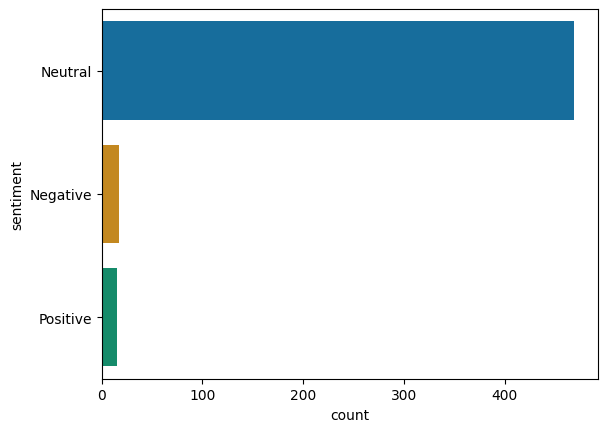

In [ ]:


bar_color = sns.color_palette("colorblind", len(df['sentiment'].unique()))


#bar_color = sns.color_palette("colorblind", len(common_word))

ax = sns.countplot(y='sentiment', data=df, palette=bar_color)
ax.xaxis.grid(False)

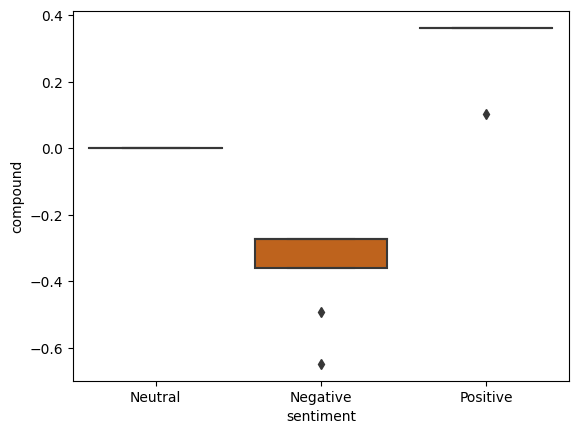

In [ ]:
# using boxplot

bar_color = sns.color_palette("Dark2", len(df['sentiment'].unique()))


ax = sns.boxplot(y='compound', x='sentiment', data=df, palette=bar_color)
ax.yaxis.grid(False)

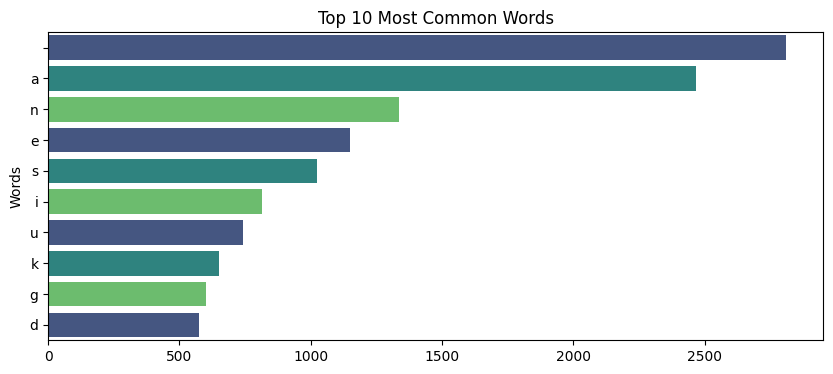

In [ ]:

df['lemmatize_text'] = df['lemmatize_words'].apply(lambda x: ' '.join(x))

# Menghitung frekuensi kata-kata dalam kolom 'lemmatize_text'
frequency = Counter(word for words in df['lemmatize_text'] for word in words)


top_words = frequency.most_common(10)

# g
words = []
counts = []
for word, count in top_words:
    words.append(word)
    counts.append(count)

bar_color = sns.color_palette("viridis", len(df['sentiment'].unique()))
    
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=counts, y=words, palette = bar_color)
plt.ylabel('Words')
plt.title('Top 10 Most Common Words')
ax.xaxis.grid(False) 

plt.show()


In [ ]:
import wordcloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=450, background_color='black', max_words=150).generate(all_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


NameError: name 'WordCloud' is not defined

# Applying VADER (Valence Aware Dictionary and Sentiment Reasoner)

VADER is a lexcion and rule-based sentiment analysis tool that is designed to analyze social media data. It uses a sentiment lexicon that includes both postive and negative sentiment words, as well as words that are often used to express sentiment in social media texts such as lol, omg. It assigns each word in a given text a sentiment score based on its presence in the sentiment lexicon and its context within the text. It then calculates an overall sentiment score for the text based on the sentiment scores of the individual words.

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\HP
[nltk_data]     PAVILION\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Preprocess the data
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(df['tweet_text'])

# Apply k-means clustering to the TF-IDF matrix to obtain the clusters
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=1)
clusters = kmeans.fit_predict(tfidf)

# Use VADER to calculate sentiment scores for each tweet within each cluster
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = []
for i in range(k):
    cluster_tweets = df.loc[clusters == i]
    for tweet in cluster_tweets['tweet_text']:
        sentiment_score = analyzer.polarity_scores(tweet)
        sentiment_scores.append(sentiment_score['compound'])

# Print the sentiment scores for each cluster
for i, score in enumerate(sentiment_scores):
    print(f"Cluster {i}: {score}")


KeyError: 'tweet_text'

In [ ]:
analyzer = SentimentIntensityAnalyzer()
def calculate_sentiment_score(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']
df['sentiment_score']=df['tweet_text'].apply(calculate_sentiment_score)
df.head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tweet_text,processed_text,sentiment_score
0,2022-01-27 14:42:36+00:00,RT GPT-3-like models with extended training co...,"[rt, gpt, like, models, extended, training, fu...",0.0000
1,2022-01-08 08:46:33+00:00,RT Testing GPT-3 on Elementary Physics Unveils...,"[rt, testing, gpt, elementary, physics, unveil...",-0.2263
2,2022-01-08 08:37:45+00:00,Testing GPT-3 on Elementary Physics Unveils So...,"[testing, gpt, elementary, physics, unveils, i...",-0.2263
3,2021-11-26 16:49:24+00:00,Now we know how @BorisJohnson wrote his speech...,"[know, borisjohnson, wrote, speech, gpt, piorf...",0.0000
4,2021-11-26 15:07:12+00:00,@sharplm shares how GPT-3 generates believable...,"[sharplm, shares, gpt, generates, believable, ...",-0.3382
5,2021-11-05 09:39:02+00:00,#ArtificialIntelligence is getting better at #...,"[getting, better, writing, amp, universities, ...",0.0000
6,2022-01-30 09:45:02+00:00,Classifying tweets with GPT-3 is easy! You can...,"[classifying, tweets, gpt, easy, use, tool, ca...",0.4926
7,2022-01-27 14:42:36+00:00,RT GPT-3-like models with extended training co...,"[rt, gpt, like, models, extended, training, fu...",0.0000
8,2022-01-08 08:46:33+00:00,RT Testing GPT-3 on Elementary Physics Unveils...,"[rt, testing, gpt, elementary, physics, unveil...",-0.2263
9,2022-01-08 08:37:45+00:00,Testing GPT-3 on Elementary Physics Unveils So...,"[testing, gpt, elementary, physics, unveils, i...",-0.2263


In [ ]:
df['sentiment'] = pd.cut(df['sentiment_score'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])
print(df['sentiment'].value_counts())


positive    48242
neutral     38300
negative    13484
Name: sentiment, dtype: int64


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


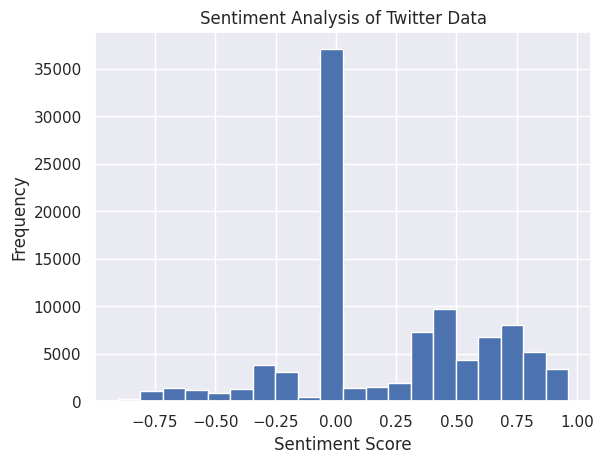

In [ ]:
plt.hist(df['sentiment_score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Twitter Data')
plt.show()

In [ ]:
# Define a function to get the sentiment polarity of a text using VADER
def get_sentiment(text):
    # Use the polarity_scores method of the analyzer to get a dictionary of polarity scores
    sentiment_dict = analyzer.polarity_scores(text)
    # Extract the sentiment polarity score (positive, negative, neutral, or compound)
    sentiment_score = sentiment_dict['compound']
    # Classify the sentiment polarity based on the compound score
    if sentiment_score >= 0.05:
        sentiment = 'positive'
    elif sentiment_score <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    # Return the sentiment polarity label
    return sentiment

In [ ]:
# Apply the get_sentiment function to each text in a list of texts
texts = ['I love Chatgpt!', 'This hate chatgpt', 'We can learn a lot from chatgpt in education sector']
sentiments = [get_sentiment(text) for text in texts]

In [ ]:
# Print the texts and their corresponding sentiment polarities
for i in range(len(texts)):
    print(f'Text: {texts[i]} \nSentiment: {sentiments[i]}\n')

# Doing Logistic Regression

Since, now we have sentiment scores for each tweets we can use sentiment scores as a feature in a supervised learning model. We can use the sentiment scores as one of the independent variables (features) in our model and the dependent variable (target) would depend on what we want to predict. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['sentiment_score'], test_size=0.2, random_state=42)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform([' '.join(text) for text in X_train])
X_test_tfidf = vectorizer.transform([' '.join(text) for text in X_test])


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert sentiment scores to binary labels
y_train_binary = np.where(y_train >= 0, 1, 0)
y_test_binary = np.where(y_test >= 0, 1, 0)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a logistic regression model and fit it to the data
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train_binary)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Evaluate the model on the test set
y_pred = logreg.predict(X_test_tfidf)
score = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", score)

Accuracy: 0.9999500149955014


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate precision
precision = precision_score(y_test_binary, y_pred)
print("Precision:", precision)

Precision: 0.999941605839416


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate recall
recall = recall_score(y_test_binary, y_pred)
print("Recall:", recall)

Recall: 1.0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate F1 score
f1 = f1_score(y_test_binary, y_pred)
print("F1 score:", f1)

F1 score: 0.9999708020672136


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_binary, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2882
           1       1.00      1.00      1.00     17124

    accuracy                           1.00     20006
   macro avg       1.00      1.00      1.00     20006
weighted avg       1.00      1.00      1.00     20006



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


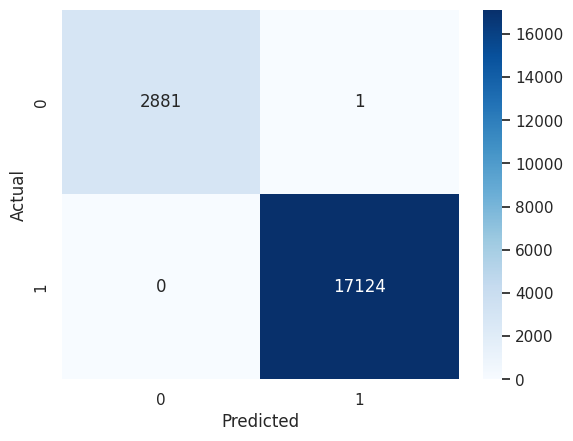

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# SentiWordNet 

SentiWordNet is a lexical resource for sentiment analysis that assigns to each synset (a set of synonyms that share a common meaning) in WordNet three sentiment scores: positivity, negativity, and objectivity. These scores indicate the degree of positivity, negativity, and objectivity associated with the synset. SentiWordNet is built using the WordNet lexical database, which provides a large set of synsets organized into a network of semantic relations.


In [ ]:
df = pd.read_csv('/content/chatgpt_tweets-4.csv')

In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd


In [ ]:
# Preprocess the text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuations
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return tokens

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def get_sentiment_score(text):
    try:
        lemmatizer = WordNetLemmatizer()
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(text)
        pos_score = 0
        neg_score = 0
        obj_score = 0
        for token in tokens:
            lemma = lemmatizer.lemmatize(token)
            synsets = list(swn.senti_synsets(lemma))
            if len(synsets) > 0:
                pos_score += synsets[0].pos_score()
                neg_score += synsets[0].neg_score()
                obj_score += synsets[0].obj_score()
        return pos_score, neg_score, obj_score
    except KeyError:
        return None, None, None

In [ ]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('universal_tagset')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
from nltk import pos_tag

# Apply the function to each tweet in the dataset
df['pos_score'], df['neg_score'], df['obj_score'] = zip(*df['tweet_text'].apply(get_sentiment_score))

In [ ]:
# Calculate the overall sentiment score for each tweet
df['sentiment_score'] = df['pos_score'] - df['neg_score']

In [ ]:

# Classify each tweet as positive, negative, or neutral based on the sentiment score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')


In [ ]:
# Print the resulting dataframe
print(df.head())

                        date  \
0  2022-01-27 14:42:36+00:00   
1  2022-01-08 08:46:33+00:00   
2  2022-01-08 08:37:45+00:00   
3  2021-11-26 16:49:24+00:00   
4  2021-11-26 15:07:12+00:00   

                                          tweet_text  pos_score  neg_score  \
0  RT GPT-3-like models with extended training co...      0.500      0.000   
1  RT Testing GPT-3 on Elementary Physics Unveils...      1.375      1.125   
2  Testing GPT-3 on Elementary Physics Unveils So...      2.125      1.375   
3  Now we know how @BorisJohnson wrote his speech...      0.625      0.000   
4  @sharplm shares how GPT-3 generates believable...      1.875      0.750   

   obj_score  sentiment_score sentiment  
0     20.500            0.500  positive  
1     14.500            0.250  positive  
2     15.500            0.750  positive  
3      6.375            0.625  positive  
4     25.375            1.125  positive  


In [ ]:
import plotly.graph_objs as go

# Create a bar chart
data = [go.Bar(x=df['sentiment'].value_counts().index,
               y=df['sentiment'].value_counts().values)]

# Add a title and axis labels
layout = go.Layout(title='Sentiment Analysis Results',
                   xaxis=dict(title='Sentiment'),
                   yaxis=dict(title='Number of Tweets'))

# Create a Figure object
fig = go.Figure(data=data, layout=layout)

# Display the figure
fig.show()
